# DSCI 100

## Introduction
In this project, we take the data set of about 300 patients with heart diseases and use it to establish a relationship between the presence of heart disease and many different factors. We will first clean and wrangle our data using the techniques learnt in DSCI 100 and then develop an exploratory analysis on it. We will utilize bar graphs, histograms and various other visualization tools. We will attempt to develop a relationship between the presence of heart diseases and explanatory variables (that we will determine using randomForest plot below) using classification kknn model. Moreover, we will split our dataset into training and testing datasets to test our model's accuracy.

In this project, we are trying to answer the question of what factors or variables will lead to higher chances of being diagnosed with heart diseases. In summary, the research question that we're trying to answer is whether we can use the kknn classification model to determine if some factors are effective at providing a quick diagnosis for heart conditions / diseases.

## Methods

## Loading the Required libraries and the Dataset

We start by providing a brief explanation of the data. This table has 14 variables namely,

* Age
* Sex
* Cp (Chest pain of levels : 1 (typical angina), 2 (atypical angina), 3 (non-anginal pain), 4 (asymptomatic))
* trestbps (Resting blood pressure in mm Hg)
* chol (cholestrol in mg/dl)
* fbs (fasting blood sugar level in mg/dl)
* restecg (resting electrocardiographic results Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria Value 1: normal Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))
* thalach (maximum heart rate)
* exang (exercise induced angina)
* oldpeak(ST depressio,)
* slope (the slope of the peak exercise ST segment — 0: downsloping; 1: flat; 2: upsloping)
* ca (number of major vessels)
* thal (A blood disorder called thalassemia Value 0: NULL Value 1: fixed defect (no blood flow in some part of the heart) Value 2: normal blood flow Value 3: reversible defect (a blood flow is observed but it is not normal))
* num (0 = no heart disease, 1 = heart disease)

Since our variables stand for very complex terms, we've chosen not to rename them. In the project below, whenever we mention the variables, we will include their meaning for the readers' convenience.

Our job is to select the most appropriate set of variables (from the 14 variables above), and attempt to build a classification model that will help us predict the onset of heart conditions.

In [41]:
library(tidyverse)
library(readr)
library(tidymodels)
library(ggplot2)
library(repr)
library(GGally)
install.packages("e1071")

df<-read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data",col_names = FALSE)
df1<-separate(df,X1,sep = ",",into =c("age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca",'thal','num'))


df1$age<-as.numeric(df1$age)
df1$sex<-as.factor(df1$sex)
df1$cp<-as.factor(df1$cp)
df1$trestbps<-as.numeric(df1$trestbps)
df1$chol<-as.numeric(df1$chol)
df1$fbs<-as.factor(df1$fbs)
df1$restecg<-as.factor(df1$restecg)
df1$thalach<-as.numeric(df1$thalach)
df1$exang<-as.factor(df1$exang)
df1$oldpeak<-as.numeric(df1$oldpeak)
df1$slope<-as.factor(df1$slope)
df1$ca<-as.factor(df1$ca)
df1$thal<-as.factor(df1$thal)
df1$num<-as.factor(df1$num)
df1$num<-replace(df1$num,df1$num %in% c("1", "2", "3", "4"),"1")



The downloaded binary packages are in
	/var/folders/_k/lgvt5y7s27s5sjx50fwzd3jr0000gn/T//RtmpYdSLOx/downloaded_packages



── Column specification ────────────────────────────────────────────────────────
cols(
  X1 = col_character()
)



Since categories 1-4 in num indicates the presense of heart diseases, we group these categories together. Thus, 0 indicates the absense of heart diseases whereas 1 indicates its presence. The code below makes our variable num binary.

In [42]:
df2<-df1%>%droplevels()
nrow(df2)
levels(df2$num)

[1] 303

[1] "0" "1"

Firstly we set the seed 123 to make sure the code is reproducible. To test the accuracy of our model, we split our data into testing and training data. Here 70% of our data will be used to generate our classification model, while 30% will be used to test the model.

The plan is to develop a model based on the training data, and test it on the testing data. This will help us determine the accuracy of our model.

In [43]:
set.seed(123)
df_splited<-initial_split(df2,prop=0.7,strata=num)
train_set <- training(df_splited)
test_set <- testing(df_splited)

head(train_set)
head(test_set)
nrow(train_set)
nrow(test_set)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
56,1.0,2.0,120,236,0.0,0.0,178,0.0,0.8,1.0,0.0,3.0,0
57,0.0,4.0,120,354,0.0,0.0,163,1.0,0.6,1.0,0.0,3.0,0
57,1.0,4.0,140,192,0.0,0.0,148,0.0,0.4,2.0,0.0,6.0,0
56,0.0,2.0,140,294,0.0,2.0,153,0.0,1.3,2.0,0.0,3.0,0
44,1.0,2.0,120,263,0.0,0.0,173,0.0,0.0,1.0,0.0,7.0,0
54,1.0,4.0,140,239,0.0,0.0,160,0.0,1.2,1.0,0.0,3.0,0


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>
63,1.0,1.0,145,233,1.0,2.0,150,0.0,2.3,3.0,0.0,6.0,0
67,1.0,4.0,120,229,0.0,2.0,129,1.0,2.6,2.0,2.0,7.0,1
37,1.0,3.0,130,250,0.0,0.0,187,0.0,3.5,3.0,0.0,3.0,0
41,0.0,2.0,130,204,0.0,2.0,172,0.0,1.4,1.0,0.0,3.0,0
62,0.0,4.0,140,268,0.0,2.0,160,0.0,3.6,3.0,2.0,3.0,1
63,1.0,4.0,130,254,0.0,2.0,147,0.0,1.4,2.0,1.0,7.0,1


[1] 211

[1] 92

## Premliminary Analysis
In this initial section of our project, we try to look at individual relationships between the presence of heart diseases and other factors such as number of major vessels, chest pain etc.

This is just an initial analysis, and we do not base our choice of variables on this alone.

For our first analysis, we look at the relationship between ca (number of blood vessels coloured by fluoroscopy) and the presence of heart condition. We do this using a stacked bar graph.

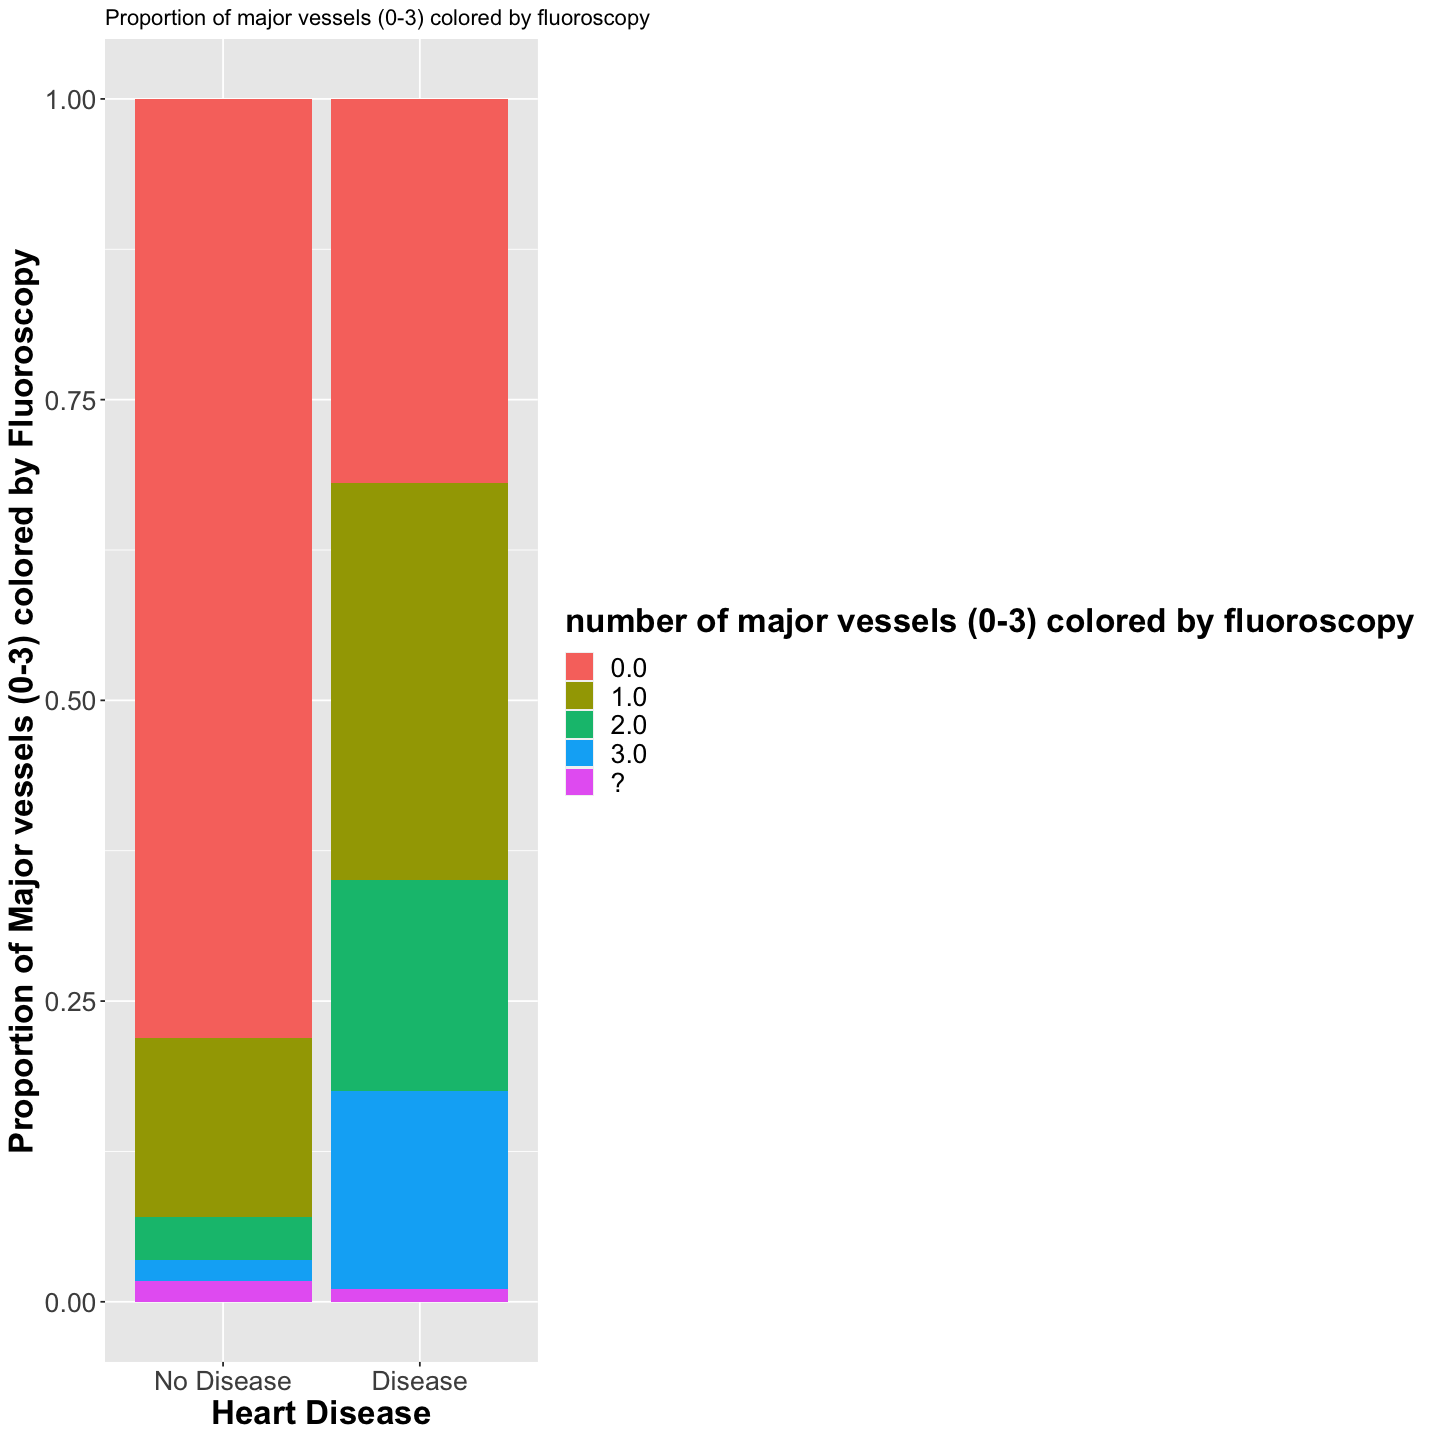

In [62]:
options(repr.plot.height = 12, repr.plot.width = 12)

plot1 <- train_set %>%
ggplot(aes(x=num,fill=ca)) +
geom_bar(position="fill") +
labs(x="Heart Disease",y="Proportion of Major vessels (0-3) colored by Fluoroscopy", fill="number of major vessels (0-3) colored by fluoroscopy") +
scale_x_discrete(breaks = c(0,1), labels = c("No Disease", "Disease")) +
ggtitle("Proportion of major vessels (0-3) colored by fluoroscopy") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"),
     legend.text = element_text(size = 16),
     legend.title = element_text(size = 20, face = "bold"))

plot1

This plot shows the disparity in the number of major vessels colored by fluroscopy between patients with heart diseases and without heart diseases

* Through the plot, we can see most people who do not suffer from any heart condition have 0 major vessel colored by fluoroscopy.

* Most people who suffer from heart conditions have 0-2 major vessels colored by fluoroscopy.

Thus, maybe number of blood vessels coloured by fluoroscopy (ca) may serve as a good explanatory variable.

Next, we move onto the relationship between heart conditions and chest pain

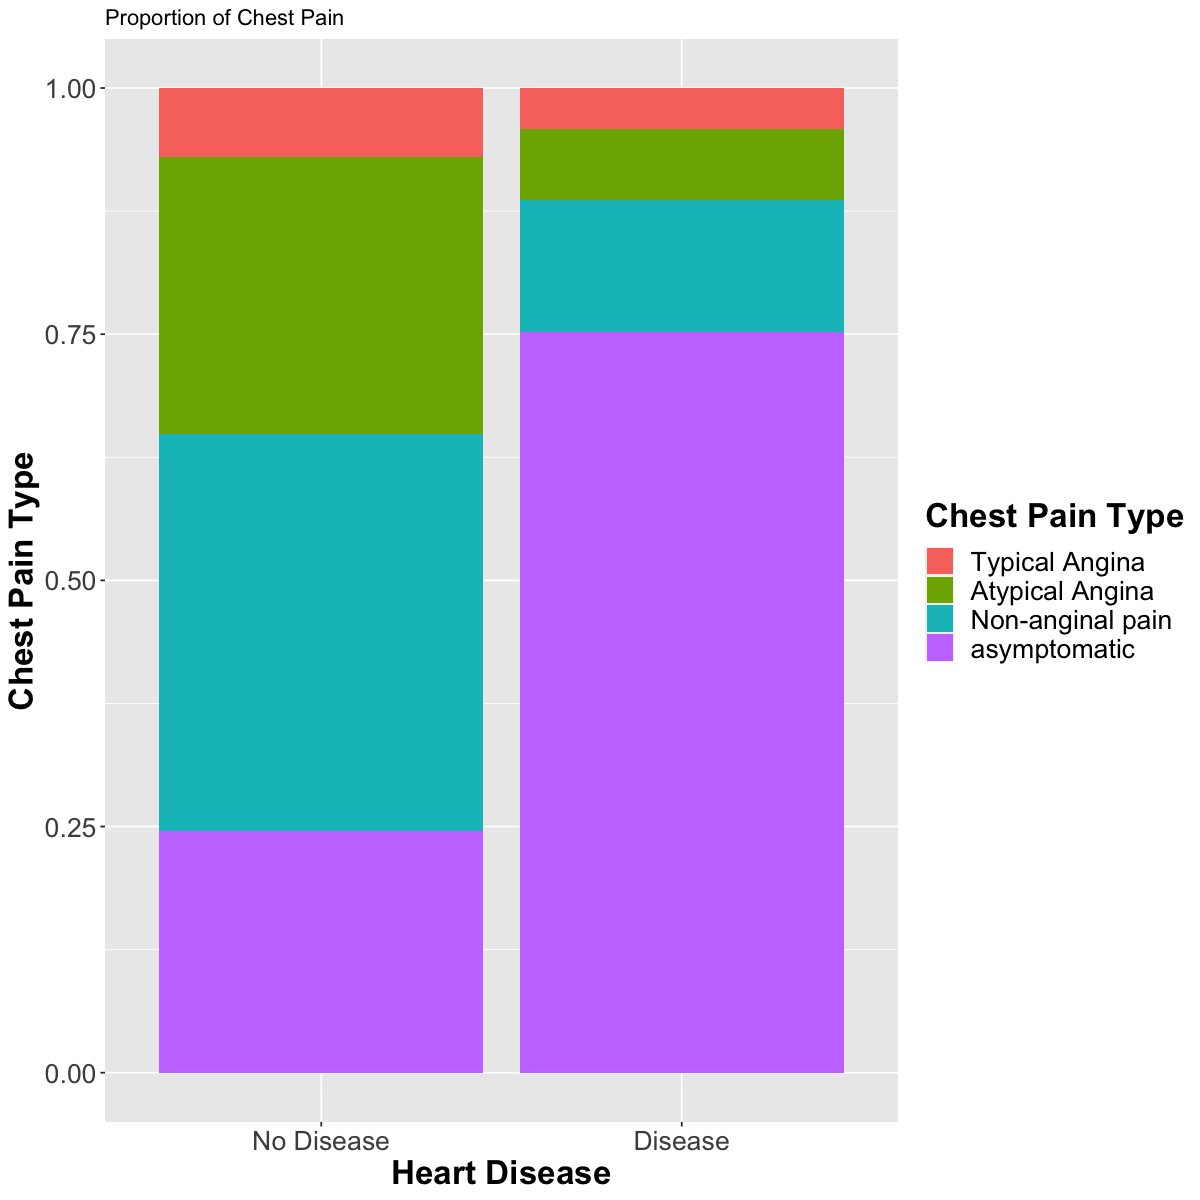

In [45]:
options(repr.plot.height = 10, repr.plot.width = 10)

train_set%>%
ggplot(aes(x=num,fill=cp))+
geom_bar(position="fill")+
labs(x="Heart Disease",y="Chest Pain Type",fill="Chest Pain Type") +
scale_x_discrete(breaks = c(0,1), labels = c("No Disease", "Disease")) +  
scale_fill_discrete(name = "Chest Pain Type", breaks = c("1.0","2.0","3.0","4.0"), labels = c("Typical Angina","Atypical Angina","Non-anginal pain","asymptomatic")) +
ggtitle("Proportion of Chest Pain") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"),
     legend.text = element_text(size = 16),
     legend.title = element_text(size = 20, face = "bold"))


From the above barplot, we see that people who suffer from heart conditions usually suffer from asymptomatic chest pain. Thus, maybe cp (chest pain) can also serve as a good explanatory variable

Next, we compare the relationship between Age and the Presence of Heart Disease

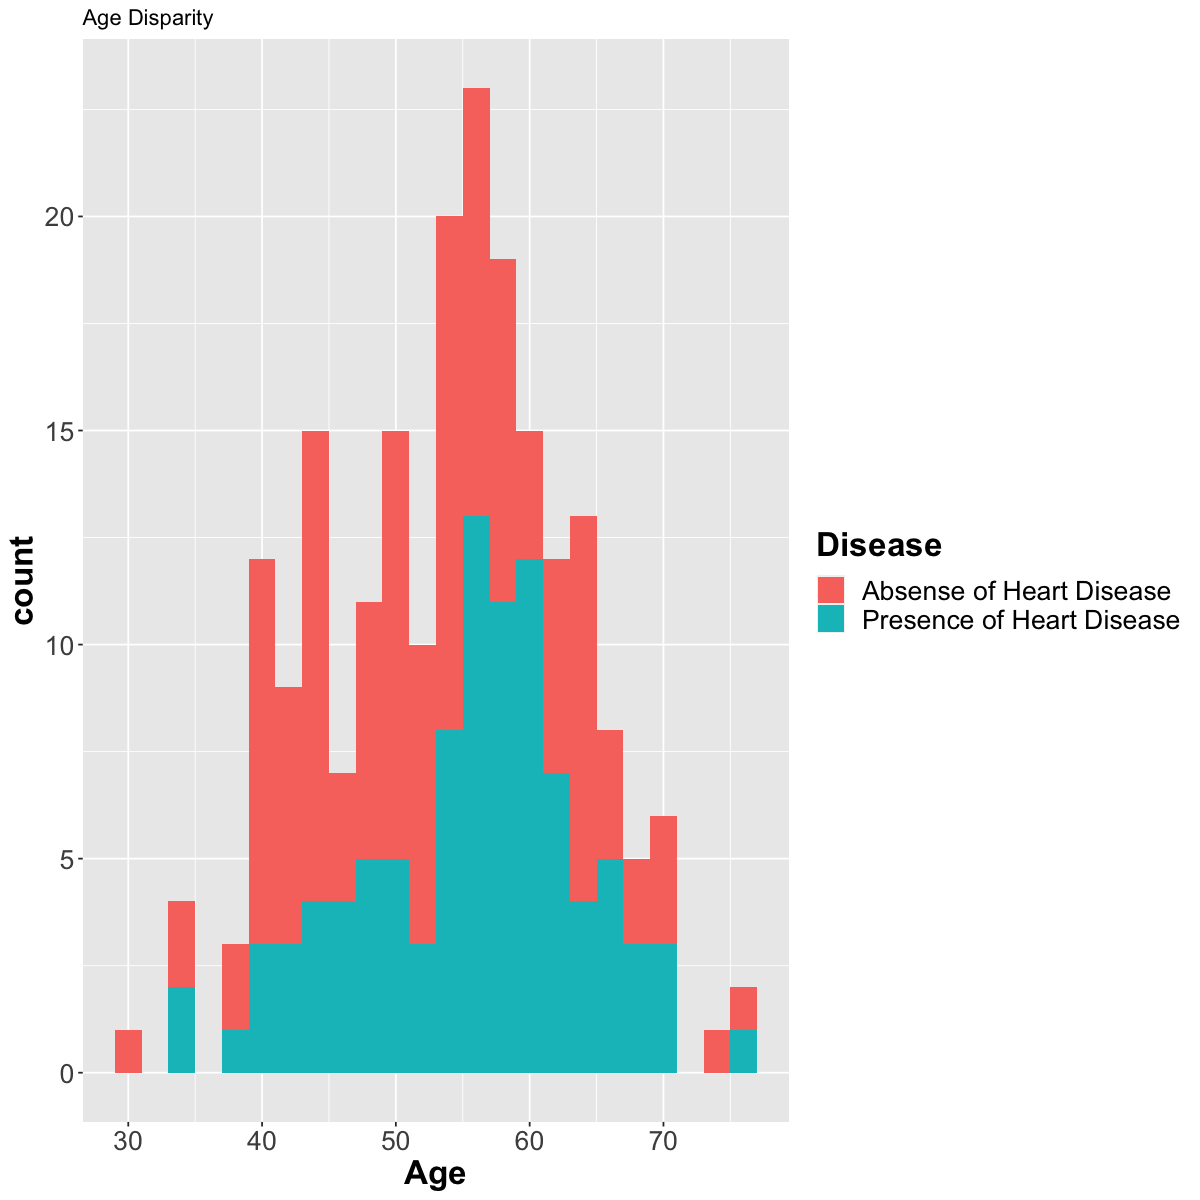

In [46]:
options(repr.plot.height = 10, repr.plot.width = 10)

train_set%>%
ggplot(aes(x=age,fill=num))+
geom_histogram(binwidth=2)+
labs(x="Age",fill="Heart Disease")+ 
scale_fill_discrete(name = "Disease", breaks = c("0","1"), labels = c("Absense of Heart Disease","Presence of Heart Disease")) +
ggtitle("Age Disparity") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"),
     legend.text = element_text(size = 16),
     legend.title = element_text(size = 20, face = "bold"))


From the above histogram we see that there is not much disparity in age between people who suffer from heart conditions, and people who don't. Thus we shouldn't consider age as a variable in our kknn classification model.

Next, we check the relationship between maximum heart rate and the presence of heart condition

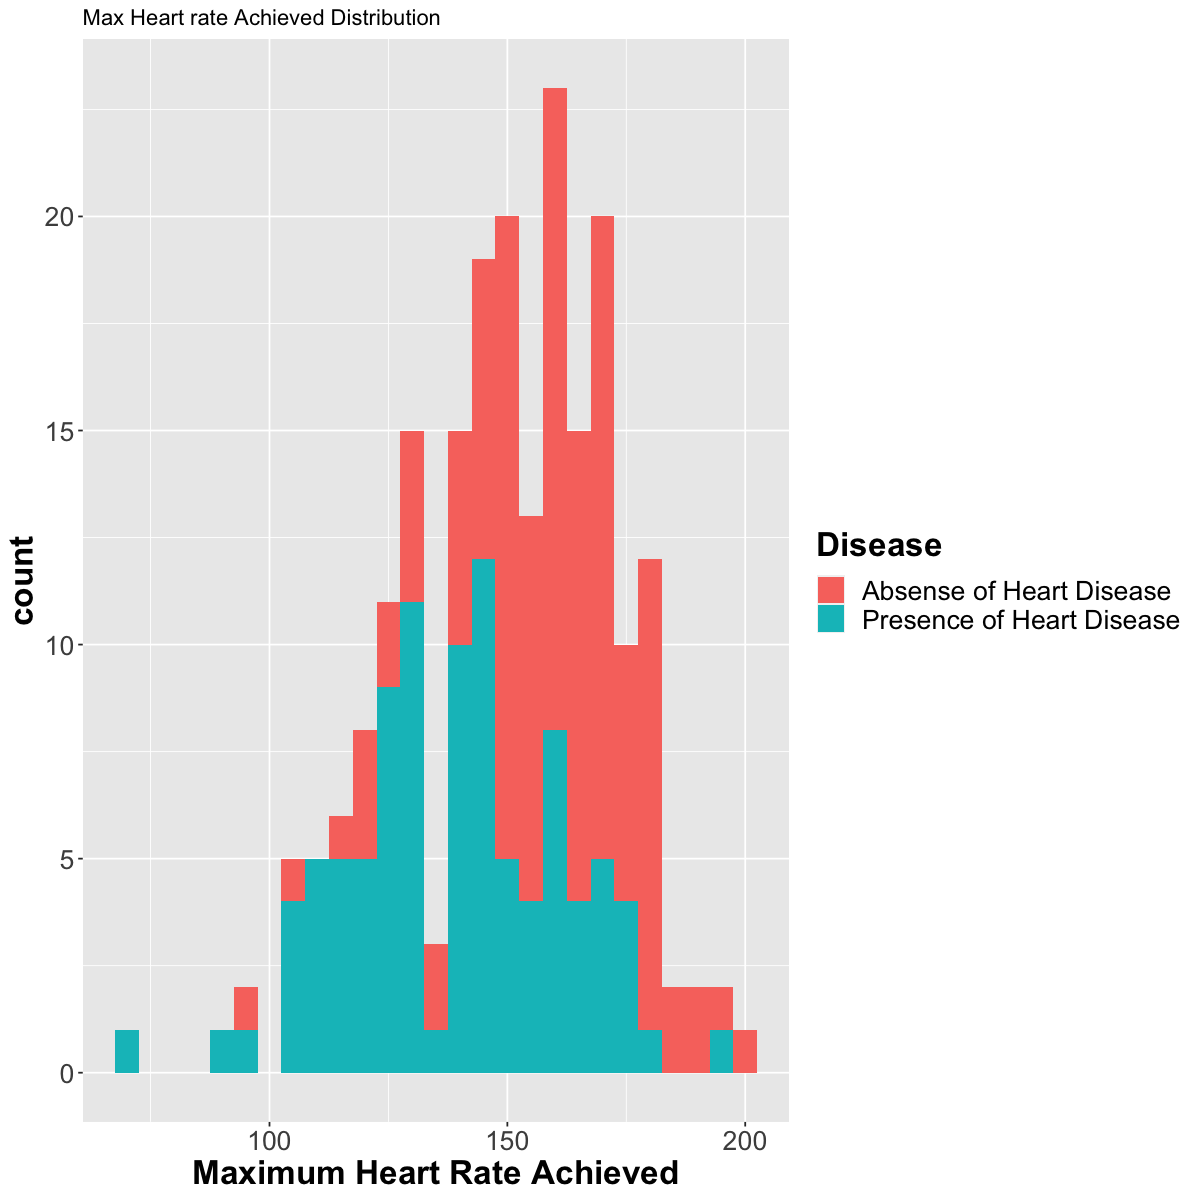

In [47]:
options(repr.plot.height = 10, repr.plot.width = 10)
train_set%>%
ggplot(aes(x=thalach,fill=num)) +
geom_histogram(binwidth=5)+
labs(x="Maximum Heart Rate Achieved",fill="Disease")+
scale_fill_discrete(name = "Disease", breaks = c("0","1"), labels = c("Absense of Heart Disease","Presence of Heart Disease")) +
ggtitle("Max Heart rate Achieved Distribution") + 
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"),
     legend.text = element_text(size = 16),
     legend.title = element_text(size = 20, face = "bold"))

From the above distribution we see that patients who do not suffer from heart conditions tend to achieve higher heart rate. Thus we can use heart rate our as explanatory variable.

Finally, as our last preliminary examination, we evaluate the relationship between ST depression induced by excercise and heart condition

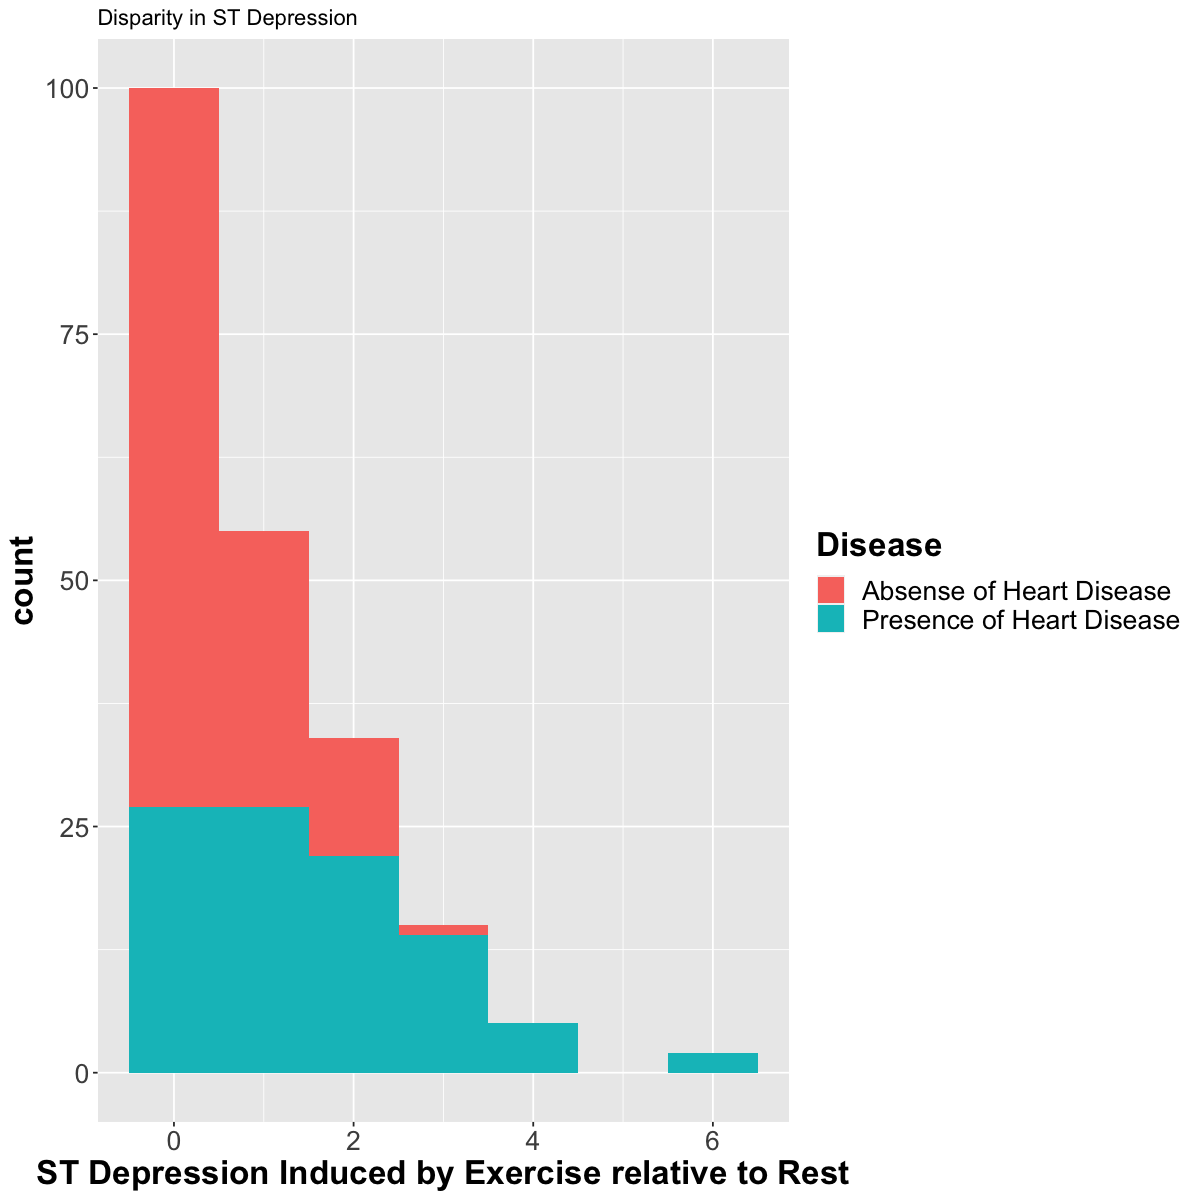

In [48]:
train_set%>%
ggplot(aes(x=oldpeak,fill=num))+
geom_histogram(binwidth=1)+
scale_fill_discrete(name = "Disease", breaks = c("0","1"), labels = c("Absense of Heart Disease","Presence of Heart Disease")) +
labs(x="ST Depression Induced by Exercise relative to Rest", fill="Disease")+
ggtitle("Disparity in ST Depression") +
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold"),
     legend.text = element_text(size = 16),
     legend.title = element_text(size = 20, face = "bold"))

Finally, we notice that patients who suffer from heart conditions tend to have higher ST depression induced by excercise relative to rest. We should use this variable to develop our kknn classification model

We make a ggpairs plot to take a look at overview of the individual relationships between pairs of variables.

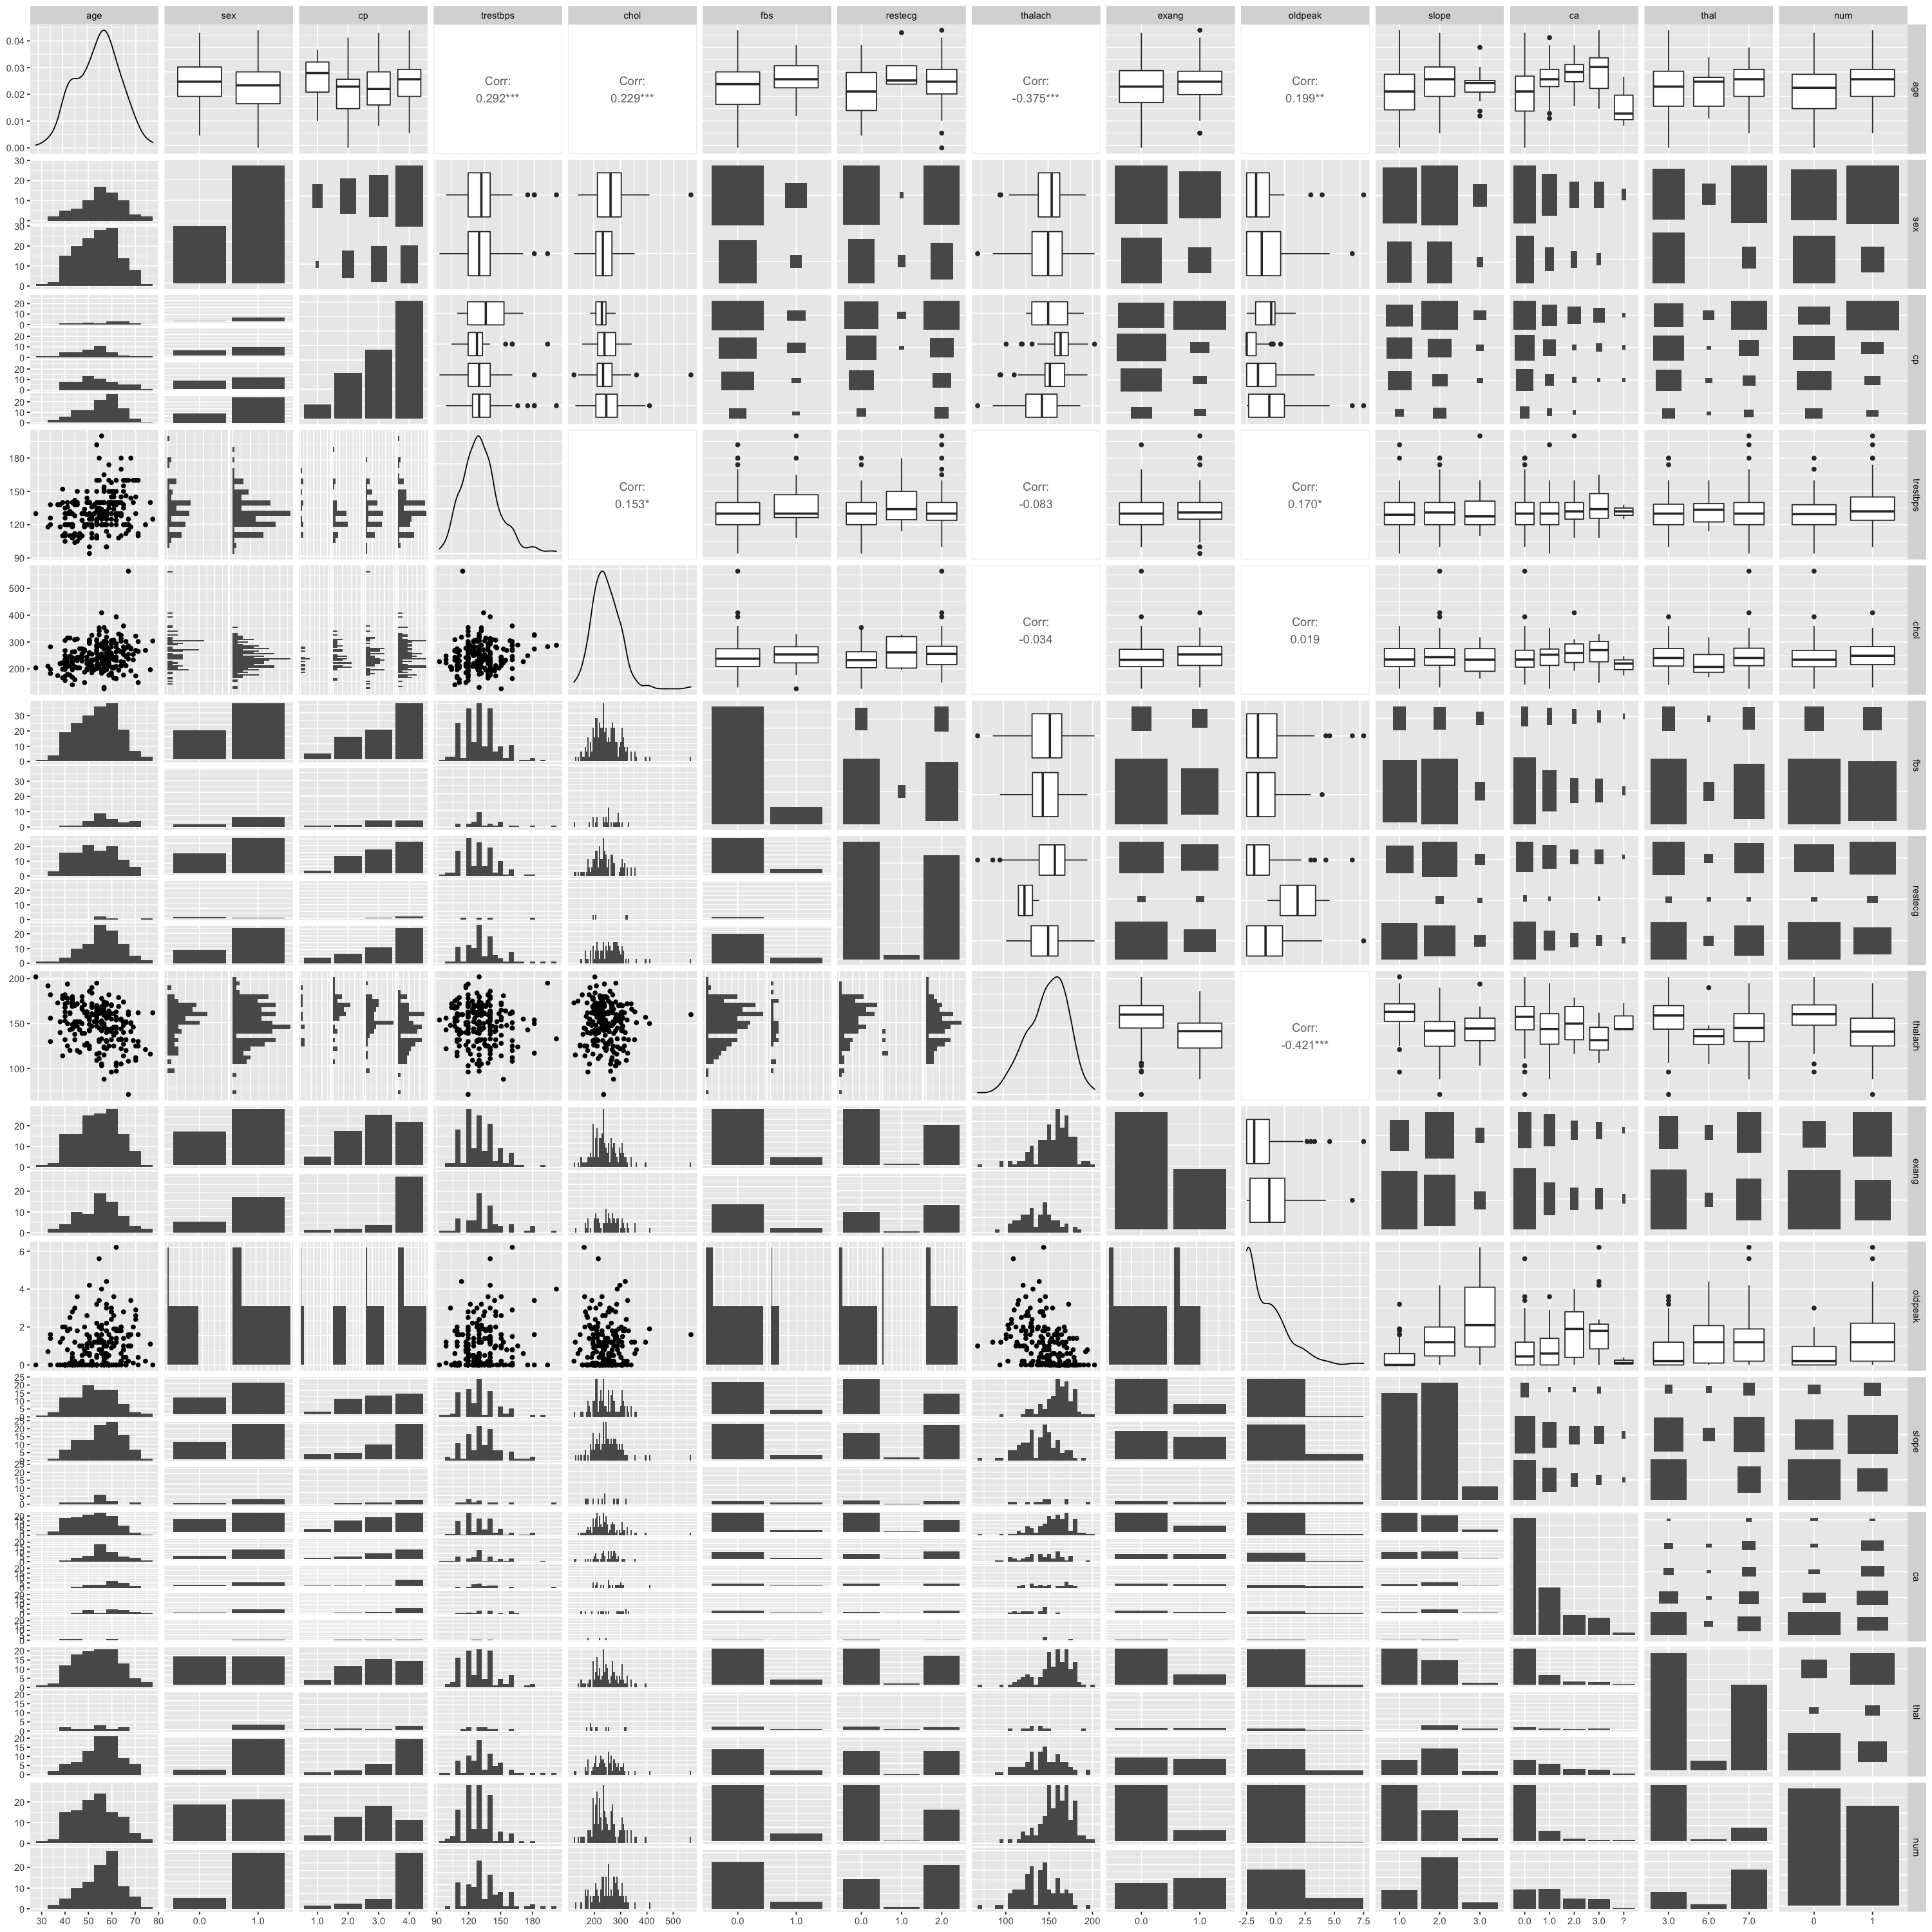

In [49]:
options(repr.plot.height = 25, repr.plot.width = 25)
train_set%>%ggpairs(lower=list(combo=wrap("facethist", binwidth=5)))

### Variable selection
We do the variable selection through the variable importance plot from the random forest library. This plot shows us that removing which variable decreases the accuracy of our model and by how much. Therefore we use the variables such that removing them would cause the greatest decrease in accuracy (ie, the most important variables.) We select the best 6 variables from the mean decrease accuracy. 

NULL

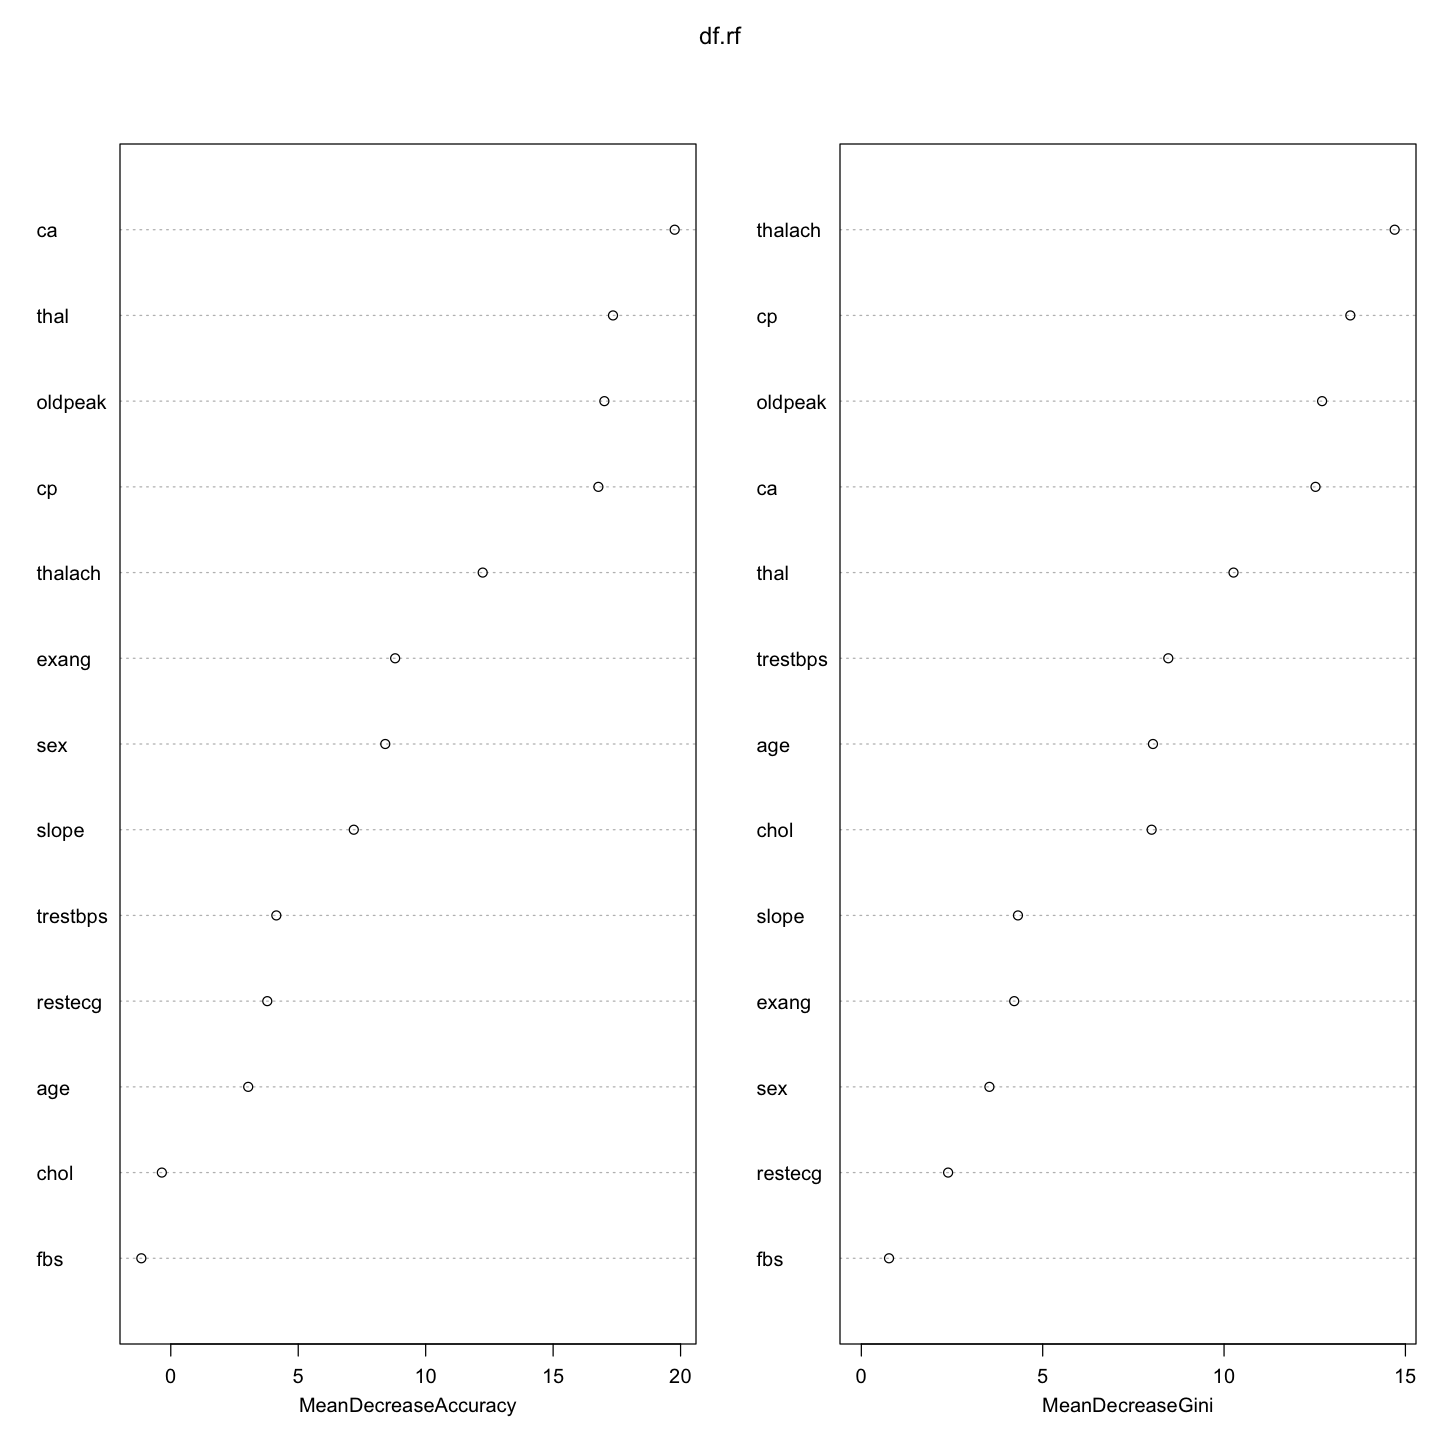

In [63]:
library(randomForest)
df.rf <- randomForest(data=train_set, num~ . , importance=TRUE, keep.forest=TRUE)

varImpPlot(df.rf)+
theme(axis.text=element_text(size=16),
     axis.title=element_text(size=20,face="bold")
     )

Looking at the plot above, we see that removing thal,ca,thalach,cp,oldpeak and slope provides the greatest reduction in accuracy. Thus we conclude our variable selection process.

Now, our research question is that whether we can develop a kknn K-Nearest Neighbours model that can use thal, ca, cp, slope, oldpeak and thalach to provide a quick diagnosis on the presence of heart conditions / diseases.

With this, we conclude our preliminary analysis.

## Building Our Classification Model
In this step, we attempt to build a kknn k-Nearest Neighbours model to do our classification. Notice that we build our model on the training dataset. This is done so that we can test our model on the testing dataset. Testing it on the testing data will help us see how our model works with data that it has not seen before. It is a very useful estimator of its accuracy and will help us enhance our model in the future.

In a k-nearest neighbours classification model, the nearest k neighbours of the new data point are taken into account, and the new data is classified according to the mode of its neighbours. To develop an accurate model, we must make sure that our data is scaled and centered.

Since we do not know the optimal value of k, we use the tune() function and use cross validation. This will help us to find a k for our model which provides the best accuracy. This is done to enhance the accuracy of our model. Firstly, we start by setting a seed to make our code reproducible.

Since the variables oldpeak and thalach are numerial, we scale and center them to make sure they have the same weight towards our model. After creating and adding our recipe and workflow, we collect the metrics to find the k with the highest accuracy. Finally, we will visualize the K VS Accuracy plot to find the best K.


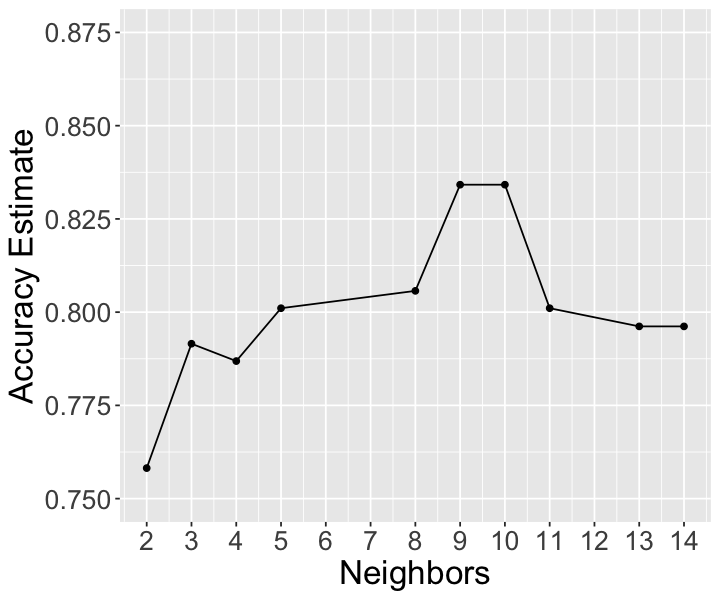

In [51]:
set.seed(123) 

options(repr.plot.height = 5, repr.plot.width = 6)

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
            set_engine("kknn") %>%
            set_mode("classification")

df_recipe <- recipe(num ~thal+ca+cp+slope+oldpeak+thalach, data = train_set)%>%step_scale(oldpeak,thalach) %>%
             step_center(oldpeak,thalach)

df_vfold <- vfold_cv(train_set, v = 5, strata = num)

knn_results <- workflow() %>%
                 add_recipe(df_recipe) %>%
                 add_model(knn_spec) %>%
                 tune_grid(resamples = df_vfold, grid = 10) %>%
                 collect_metrics()

accuracies <- knn_results %>%
                 filter(.metric == 'accuracy')

cross_val_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
                  geom_point() +
                  geom_line() +
                  labs(x = 'Neighbors', y = 'Accuracy Estimate') +
                  theme(text = element_text(size = 20))+
                  scale_x_continuous(breaks = seq(0, 16, 1)) +
                  scale_y_continuous(limits = c(0.750, 0.875))

cross_val_plot

Looking at the plot above, we see that we get the highest accuracy when we set the value of k to be 8. Thus, we will use k = 8 to build our kknn classification model.

## Best KNN model with best 6 variable
Now we repeat the same step as above, but instead setting the value of k to be 8. We test our model on the testing data. Then we bind the testing dataset into our predictons to calculate the accuarcy. We also make a confusion matrix to see in which category our model makes the most mistakes in. 

In [52]:
set.seed(123)

df_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 8) %>% set_engine("kknn") %>% set_mode("classification")

df_selected_recipe<-recipe(num ~thal+ca+cp+slope+oldpeak+thalach, data = train_set)%>%step_scale(oldpeak,thalach) %>%
               step_center(oldpeak,thalach)

df_knn_fit <- workflow() %>% add_recipe(df_selected_recipe) %>% add_model(df_knn_spec) %>% fit(data = train_set)

df_prediction <- predict(df_knn_fit, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = .pred_class)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = .pred_class) 
df_metrics

df_conf_mat

knn_accuracy<-df_metrics%>%slice(1)%>%pull()
knn_accuracy

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7934783
kap,binary,0.5765504


          Truth
Prediction  0  1
         0 45 14
         1  5 28

[1] 0.7934783

From the above table we see that our model is 80% accurate. 

## Discussion

We are able to build a build that is accurate 80% of the time. This means that if we give our model some data about the health of a person, our model will be able to predict whether or not the person is / would suffer from heart conditions in the future, with an accuracy of 80%. 

Using premliminary plots and random Forest plots helped us decide on the most efficient combination of variables, whereas the k-nearest neighbours model helped us build a classification model. 5 fold and cross validation helped us pick the most efficient value of k.

We expected to find such results. Looking at many scientific articles (Hjalmarson, 2007), we know that heart rate, ST depression induced due to excerise and various other factors are signs of a declining heart health. Thus, we were right in choosing our variables.

This research has a significant effect on people's lives. Using this study, we can educate people into maintaining their health, and going to a doctor for regular checkups. This will help us detect deteriorating health and treat it, before it is too late.

Lastly, this study also gives rise to bigger questions such as
* Which variable (out of the 6 that we used) has a higher affect on heart?
* What other variables did we not take into account?

## Appendix

Since we know there are many different models for doing the classification. We decide to fit some different models and see which model has the best perfomance.

## Setting the tuning parameters for random forest model

In [53]:
reps=5
varz = c(1,2,3,4,6)
nodez = c(1,3,5,7,10)

NS = length(nodez)
M = length(varz)
rf.oob = matrix(NA, nrow=M*NS, ncol=reps)

for(r in 1:reps){
  print(paste0(r, "of", reps))
  counter=1
  for(m in varz){
    for(ns in nodez){
      df.rfm <- randomForest(data=train_set, num~thal+ca+cp+slope+oldpeak+thalach, 
                              mtry=m, nodesize=ns)
      rf.oob[counter,r] = mean(predict(df.rfm, type="response") != train_set$num)
      counter=counter+1
    }
  }
}

[1] "1of5"
[1] "2of5"
[1] "3of5"
[1] "4of5"
[1] "5of5"


1|10       1|3       1|1       1|5       1|7      3|10      2|10      4|10 
0.1753555 0.1829384 0.1838863 0.1848341 0.1848341 0.1895735 0.1905213 0.1905213 
      6|7       2|7       3|3       3|7       2|1       2|3       3|5      6|10 
0.1905213 0.1933649 0.1933649 0.1933649 0.1943128 0.1943128 0.1943128 0.1943128 
      3|1       6|5       2|5       4|7       4|1       4|3       6|3       4|5 
0.1962085 0.1981043 0.1990521 0.1990521 0.2018957 0.2028436 0.2037915 0.2056872 
      6|1 
0.2066351

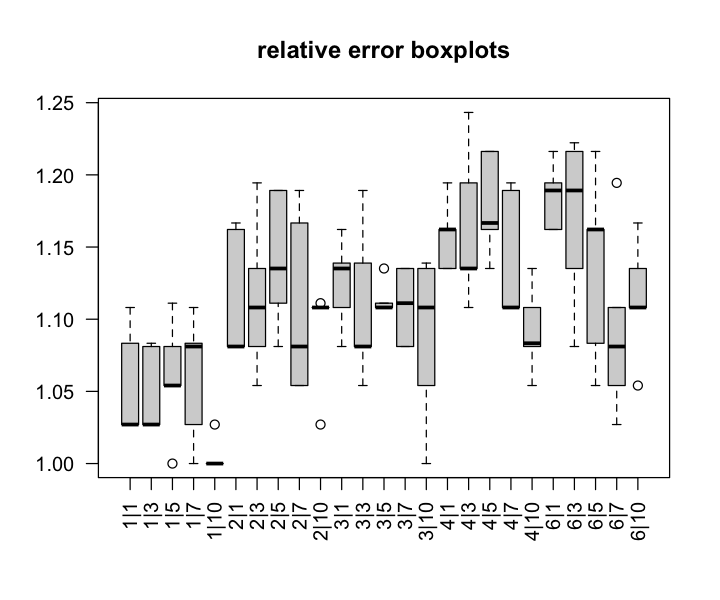

In [54]:
parms = expand.grid(nodez,varz)
row.names(rf.oob) = paste(parms[,2], parms[,1], sep="|")

mean.oob = apply(rf.oob, 1, mean)
mean.oob[order(mean.oob)]

min.oob = apply(rf.oob, 2, min)


boxplot(t(rf.oob)/min.oob, use.cols=TRUE, las=2, 
        main="relative error boxplots")


Parameter tuning of ‘randomForest’:

- sampling method: 5-fold cross validation 

- best parameters:
 mtry nodesize
    1        8

- best performance: 0.1704319 

- Detailed performance results:
   mtry nodesize     error dispersion
1     1        1 0.1844961 0.05483321
2     2        1 0.1986711 0.07068362
3     3        1 0.1987818 0.04441947
4     4        1 0.1987818 0.05573936
5     5        1 0.2178295 0.02899347
6     6        1 0.2178295 0.03751686
7     1        2 0.1798450 0.03788444
8     2        2 0.1940199 0.06457145
9     3        2 0.1939092 0.06156198
10    4        2 0.2035437 0.04128129
11    5        2 0.2083056 0.04721071
12    6        2 0.2129568 0.04515639
13    1        3 0.1892580 0.04838296
14    2        3 0.1846069 0.05299961
15    3        3 0.1939092 0.06382260
16    4        3 0.2036545 0.04849215
17    5        3 0.2035437 0.04128129
18    6        3 0.2081949 0.04919456
19    1        4 0.1798450 0.04145693
20    2        4 0.1891473 0.06280227
21   

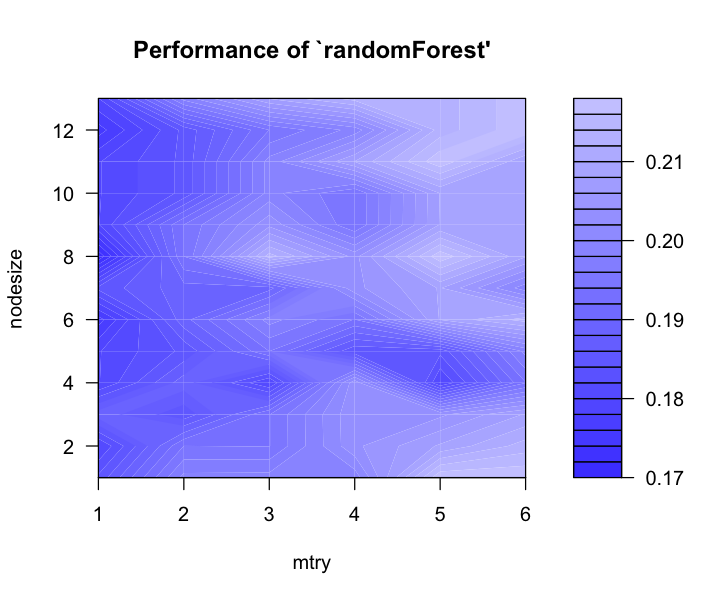

In [55]:
library("e1071")
set.seed(123)
tuning <- tune(randomForest, num~thal+ca+cp+slope+oldpeak+thalach, data = train_set,ranges = list(mtry=(1:6), nodesize=(1:13)),tunecontrol = tune.control(cross=5))
summary(tuning)
plot(tuning)

## Random forest model with mtry=2 and nodesize=7

In [56]:
set.seed(123)
df.rf <- randomForest(data=train_set, num~ thal+ca+cp+slope+oldpeak+thalach , mtry=2, nodesize=7,  importance=TRUE, keep.forest=TRUE)


df_prediction <- predict(df.rf, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

rf_27_accuracy<-df_metrics%>%slice(1)%>%pull()
rf_27_accuracy

New names:
* `` -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8152174
kap,binary,0.6269084


          Truth
Prediction  0  1
         0 42  9
         1  8 33

[1] 0.8152174

## Random forest model with mtry=4 and nodesize=10

In [57]:
set.seed(123)

df.rf <- randomForest(data=train_set, num~ thal+ca+cp+slope+oldpeak+thalach , mtry=1, nodesize=2,  importance=TRUE, keep.forest=TRUE)


df_prediction <- predict(df.rf, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

rf_410_accuracy<-df_metrics%>%slice(1)%>%pull()
rf_410_accuracy

New names:
* `` -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8043478
kap,binary,0.6011561


          Truth
Prediction  0  1
         0 44 12
         1  6 30

[1] 0.8043478

## Logistic regression

In [58]:
library(nnet)

logis_mod <- multinom(data=train_set, formula=num ~ thal+ca+cp+slope+oldpeak+thalach, trace=TRUE)

df_prediction <- predict(logis_mod, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

lg_accuracy<-df_metrics%>%slice(1)%>%pull()
lg_accuracy

# weights:  16 (15 variable)
initial  value 146.254055 
iter  10 value 72.254849
iter  20 value 71.233815
final  value 71.233813 
converged


New names:
* `` -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8369565
kap,binary,0.6682692


          Truth
Prediction  0  1
         0 45 10
         1  5 32

[1] 0.8369565

## Tuning parameters for SVM


Parameter tuning of ‘svm’:

- sampling method: 5-fold cross validation 

- best parameters:
     gamma cost
 0.0078125  256

- best performance: 0.1465116 

- Detailed performance results:
           gamma cost     error dispersion
1   2.441406e-04    2 0.4592470 0.08101742
2   4.882812e-04    2 0.4544850 0.08884102
3   9.765625e-04    2 0.2603544 0.05848052
4   1.953125e-03    2 0.2129568 0.05104893
5   3.906250e-03    2 0.1987818 0.04441947
6   7.812500e-03    2 0.1847176 0.05097229
7   1.562500e-02    2 0.1799557 0.03884858
8   3.125000e-02    2 0.1844961 0.05977938
9   6.250000e-02    2 0.1655592 0.04556262
10  1.250000e-01    2 0.1654485 0.05324749
11  2.500000e-01    2 0.1655592 0.05409521
12  5.000000e-01    2 0.1703212 0.04985941
13  1.000000e+00    2 0.2084164 0.03817909
14  2.000000e+00    2 0.2366556 0.05086994
15  4.000000e+00    2 0.3121816 0.08059323
16  8.000000e+00    2 0.3499446 0.10353856
17  1.600000e+01    2 0.4260244 0.06397638
18  3.200000e+01    2 0.4592470 0.07

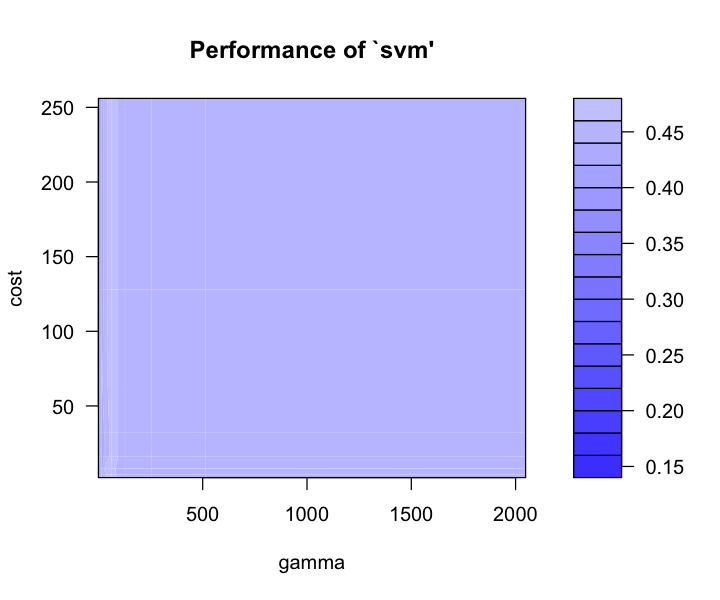

In [59]:
library("e1071")
set.seed(123)
tuning <- tune(svm, num~thal+ca+cp+slope+oldpeak+thalach, data = train_set,ranges = list(gamma = 2^(-12:11), 
                                                          cost = 2^(1:8)),tunecontrol = tune.control(cross=5))
summary(tuning)
plot(tuning)

## Support Vector machine with best 6 variables

In [60]:
set.seed(123)

svm_mod <- svm(data=train_set, num ~ thal+ca+cp+slope+oldpeak+thalach , kernel="radial", 
               gamma= 0.001953125 , cost=16)

df_prediction <- predict(svm_mod, test_set)%>%
                        bind_cols(test_set)

df_metrics <- df_prediction %>% metrics(truth = num, estimate = `...1`)

df_conf_mat <- df_prediction %>%
                        conf_mat(truth = num, estimate = `...1`) 
df_metrics

df_conf_mat

svm_accuracy<-df_metrics%>%slice(1)%>%pull()
svm_accuracy

New names:
* `` -> ...1



.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.8478261
kap,binary,0.6909789


          Truth
Prediction  0  1
         0 45  9
         1  5 33

[1] 0.8478261

We make a table to compare which model has the best performance

In [61]:
tibble(knn_accuracy,rf_27_accuracy,rf_410_accuracy,lg_accuracy,svm_accuracy)

knn_accuracy,rf_27_accuracy,rf_410_accuracy,lg_accuracy,svm_accuracy
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7934783,0.8152174,0.8043478,0.8369565,0.8478261


Through the table above that we found out all the model has the similar performance and svm model has the highest accuracy.